In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

import active_learning_code_20220325

In [4]:
plot_size = (12, 6.75)  # The size of all the plots
x_d = 1 # Used to define the number of variables in input layer
y_d = 1 # Used for define the number of variables in output layer

def obj_f(a):
    return -a*np.sin(a)

number_of_range_points = 201
x_mini, x_maxi =  np.array(0), np.array(15)

x_range = np.linspace(x_mini, x_maxi, number_of_range_points)
all_true_y = obj_f(x_range)
max_distance_in_y = active_learning_code_20220325.max_distance(all_true_y)

number_of_training_points = 6
# Indices for the training points by number_of_training_points
train_indices = [j for j in range(len(x_range))
                 if j % (int((len(x_range)-1)/(number_of_training_points-1))) == 0]
print('train_indices', train_indices)

def plot_1D(plot_size, x_range, all_true_y, noised_all_y, max_allowed_pred_error,
            x_train, y_train, obj_f, random_seed, noise_level):
    plt.figure(figsize=plot_size)
    plt.plot(x_range, all_true_y, label='all_true')
    plt.plot(x_range, noised_all_y, linestyle='dashed', label='noised_all_true')
    plt.plot(x_range, noised_all_y+max_allowed_pred_error, linestyle=':', label='pred_upper_limit')
    plt.plot(x_range, noised_all_y-max_allowed_pred_error, linestyle=':', label='pred_lower_limit')
    plt.scatter(x_train, obj_f(x_train), label='noise_free_training_point')
    plt.scatter(x_train, y_train, s=30, c='r', label='noised_training_point')
    for i in range(len(x_train)):
        plt.annotate(str(i+1), xy=(x_train[i], y_train[i]), xytext=(x_train[i]+0.015, y_train[i]+0.015))
    plt.title('Random seed in {} and noise in {}%' .format(random_seed, 100*noise_level))
    plt.legend()
    plt.show()
    

train_indices [0, 40, 80, 120, 160, 200]


Random seed:  30 , noise portion:  0.05
x_train is: [ 0.  3.  6.  9. 12. 15.]
y_train is: [ 0.36330499 -1.06649589  2.90239457 -4.53856497  5.61770357 -9.93350583]
The termination_mse_threshold is:  0.1323461023164745
The max_allowed_pred_error constrain is:  1.2602195157184697


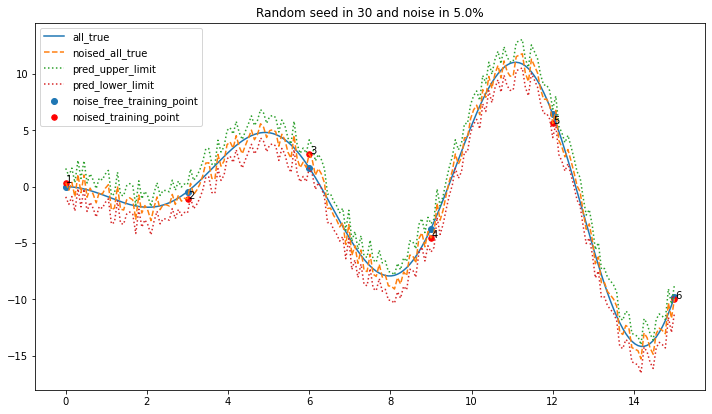

In [5]:
# Set the noise level and random seed to generate the training dataset
noise_level  = 0.05
random_seed =30
print("Random seed: ", random_seed, ', noise portion: ', noise_level)
noise_distance = noise_level * max_distance_in_y

current_dir = os.getcwd()
# Change the working folder relating to the noise level
working_folder = os.path.join(current_dir, 'Noise_level_'+ str(noise_level))
if not os.path.exists(working_folder):
    os.makedirs(working_folder)
os.chdir(working_folder)

# Generate the noised y and get the x_train and y_train as the training dataset
np.random.seed(random_seed)
noised_all_y = all_true_y + np.random.uniform(-1.0, 1.0, size=all_true_y.shape) * noise_distance
x_train, y_train = x_range[train_indices], noised_all_y[train_indices]

# Calculate the termination_mse_threshold and the maximum allowed prediction error
termination_mse_threshold = (1/12) * np.power(noise_level, 2) * np.power(max_distance_in_y, 2)
max_allowed_pred_error =  noise_level * max_distance_in_y

print('x_train is:', np.squeeze(x_train))
print('y_train is:', np.squeeze(y_train))
print('The termination_mse_threshold is: ', termination_mse_threshold)
print('The max_allowed_pred_error constrain is: ', max_allowed_pred_error)

# Plotting the function and the noised (noise free) training data points
plot_1D(plot_size, x_range, all_true_y, noised_all_y, max_allowed_pred_error,
        x_train, y_train, obj_f, random_seed, noise_level)

----------------------------------------------------------
The 1st prediction by QBC. 

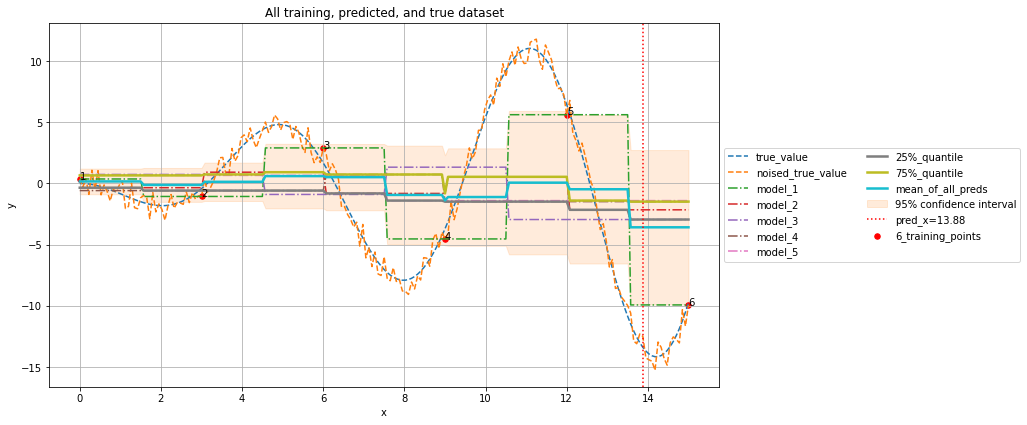

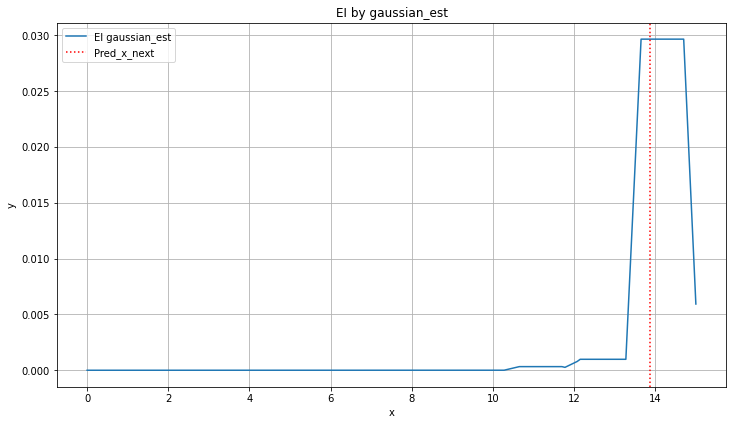

The predicted x_next=13.875 with EI of y in 0.02963740975436238.
Extended x_train: [ 0.     3.     6.     9.    12.    15.    13.875]
Extended y_train: [  0.36330499  -1.06649589   2.90239457  -4.53856497   5.61770357
  -9.93350583 -13.40090001]
----------------------------------------------------------
The 2th prediction by QBC. 

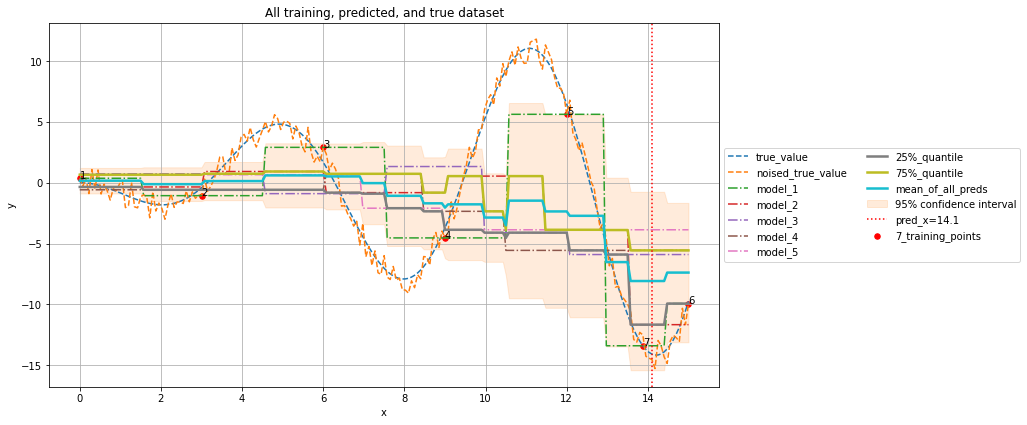

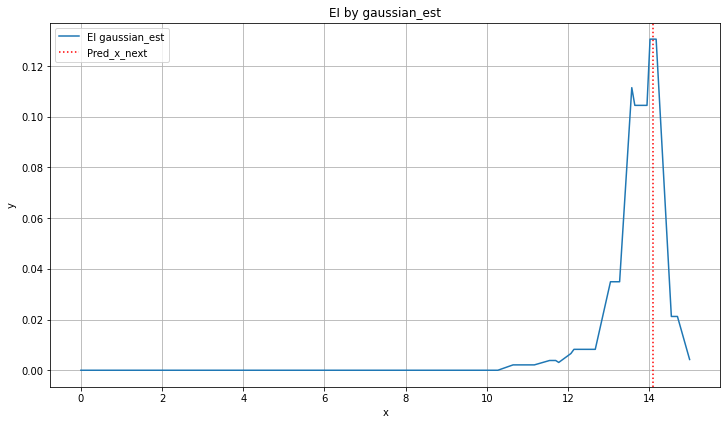

The predicted x_next=14.1 with EI of y in 0.13063010895145627.


[13.875, 14.1]

In [7]:
predict_n_steps_further = 2  # Control the number of prediction steps.
show_plot = True # The policy of showing the plot in the user interface or not.

solver = active_learning_code_20220325.ActiveLearningSolver()

for i in range(5):    
    model, model_type, kargs  = solver.define_a_model(
        x_d=x_d, y_d=y_d, model_type=KNeighborsRegressor, n_neighbors=i+1, 
        weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski',
        metric_params=None, n_jobs=None)

    solver.add_model_to_QBC(model, model_type, kargs)
    
solver.fit_models(x_train=x_train, y_train=y_train)
solver.predict_n_steps_by_QBC(true_y_next=False, n_step=predict_n_steps_further,
                              orig_func=[all_true_y, noised_all_y], x_range=x_range, pdf_type='Gaussian',
                              plot_size=(12, 6.7), show_plot=show_plot, aqf_plot=True, threshold=0.01, epsilon=0.6)

----------------------------------------------------------
The 1st prediction by QBC. 

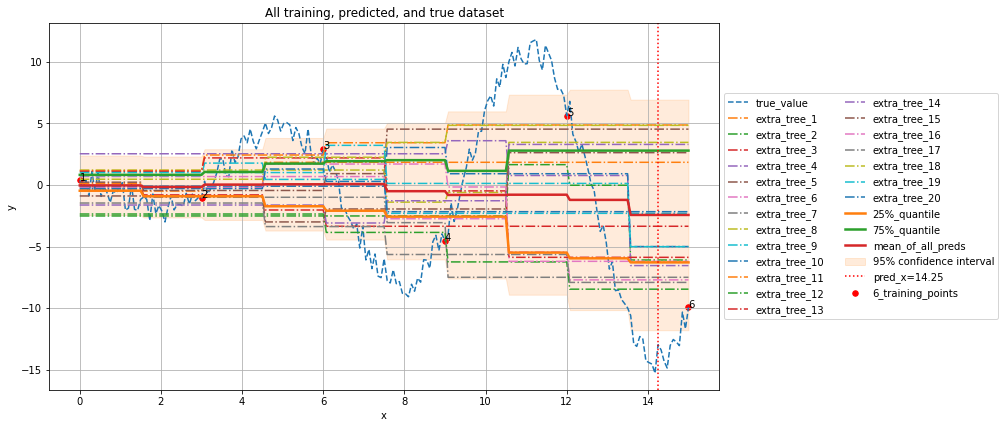

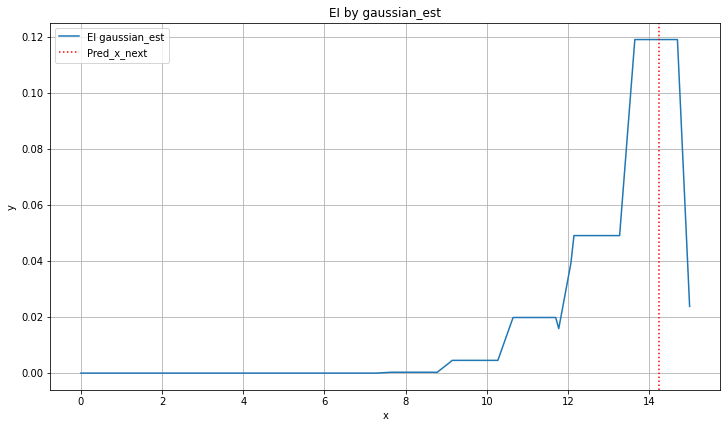

The predicted x_next=14.25 with EI of y in 0.11896419792404289.
Extended x_train: [ 0.    3.    6.    9.   12.   15.   14.25]
Extended y_train: [  0.36330499  -1.06649589   2.90239457  -4.53856497   5.61770357
  -9.93350583 -12.96727623]
----------------------------------------------------------
The 2th prediction by QBC. 

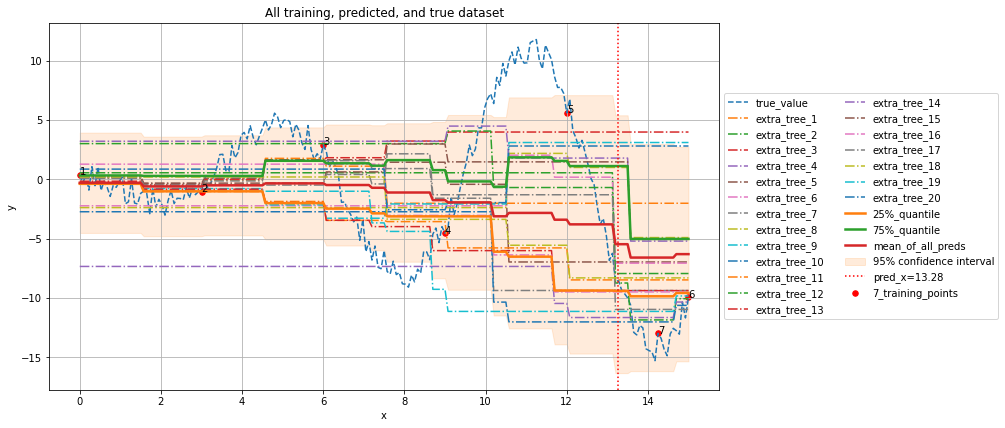

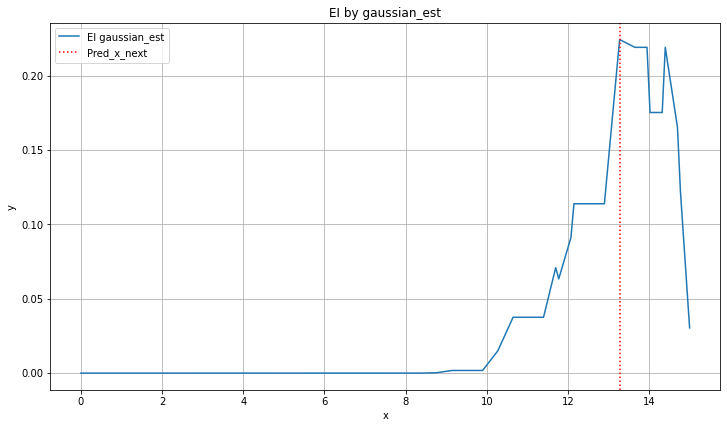

The predicted x_next=13.275 with EI of y in 0.22436186190812035.


[14.25, 13.275]

In [8]:
predict_n_steps_further = 2  # Control the number of prediction steps.
show_plot = True # The policy of showing the plot in the user interface or not.
solver = active_learning_code_20220325.ActiveLearningSolver()
model, model_type, kargs  = solver.define_a_model(x_d=x_d, y_d=y_d) 
solver.fit_models(x_train=x_train, y_train=y_train, extra_tree_method='forest', tau=['mae', noise_distance])
solver.predict_n_steps_by_QBC(true_y_next=False, n_step=predict_n_steps_further, orig_func=noised_all_y, 
                              x_range=x_range, pdf_type='Gaussian', plot_size=plot_size, show_plot=show_plot,
                               aqf_plot=True, threshold=0.01, epsilon=0.6)

alpha 0.1323461023164745
noise_distance 1.2602195157184697


C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1.2602195157184697. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1.2602195157184697. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


The predicted next x by Gaussian Process is [[14.475]] with the maximumExpected_Improvement in 0.3453638710811919.


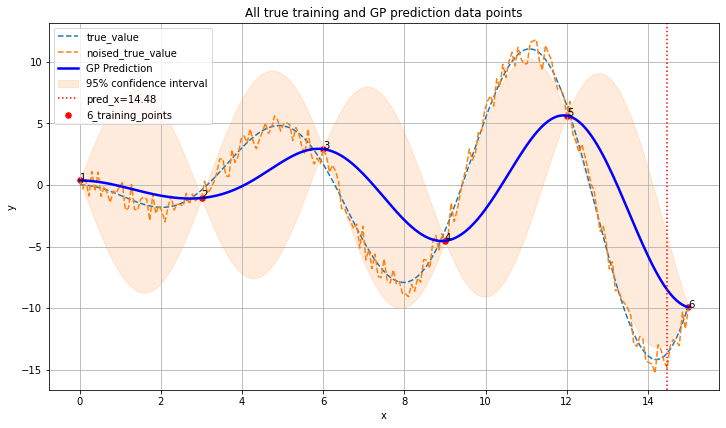

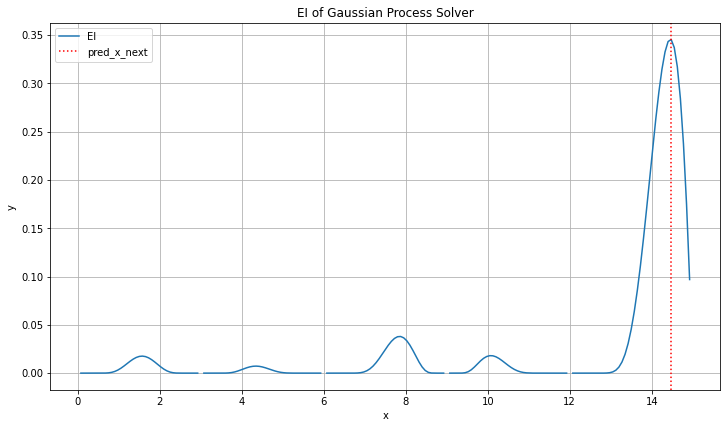

C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 1.2602195157184697. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
C:\Python310\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified lower bound 1.2602195157184697. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


The predicted next x by Gaussian Process is [[14.1]] with the maximumExpected_Improvement in 0.7157402275143432.


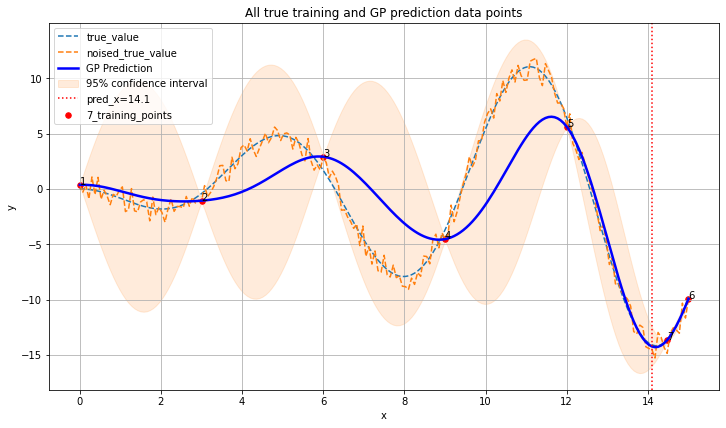

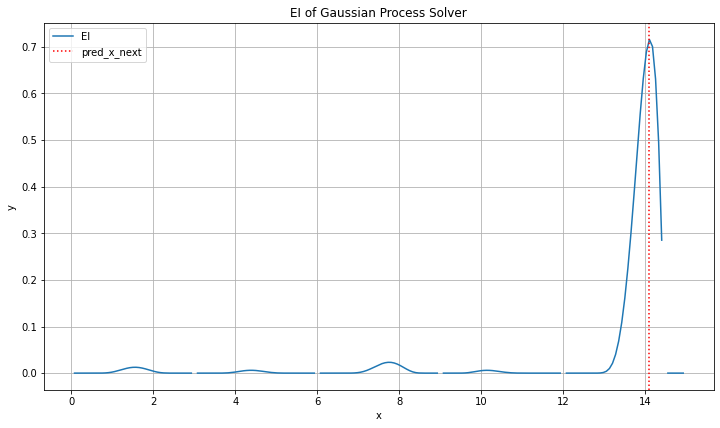

Parameters are saved at 20220404-094018-333


In [12]:
predict_n_steps_further = 2
show_plot = True
print('alpha', alpha)
print('noise_distance', noise_distance)
solver = active_learning_code_20220325.ActiveLearningSolver()
GP = solver.predict_by_GP(x_train, y_train, x_range, n_step=predict_n_steps_further, aqf_plot=True,
            plot_size=plot_size, show_plot=show_plot, y_true_in_x_range=[all_true_y, noised_all_y],
            orig_func=obj_f, constant_value=1.0, constant_value_bounds=(noise_distance, 10000.0),
            length_scale_bounds=(noise_distance, 10000.0), length_scale=1.0, optimizer='fmin_l_bfgs_b',
            n_restarts_optimizer=30, alpha=0.0001, normalize_y=True)

The true y_min is -14.16485658530511, but the accepted min values (y_min + noise_distance) is -12.90463706958664.
There are 12 accepted minimum points over x_range.
Gaussian_Process_Solver predict 2 steps, and there are 2 predictions of x_next within the accepted minimum range.
Step_1 is the first time of the solver having x_next within the accepted minimum range.


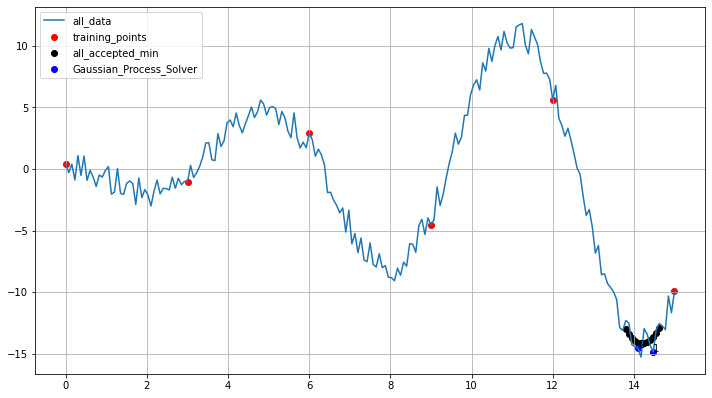

In [14]:
message = solver.result_analysis(x_range, noised_all_y, obj_f, x_train, y_train, figsize=plot_size, show_plot=show_plot, noise_distance=noise_distance)